# NLP Basic Ïã§Ïäµ - Text Preprocessing

In [1]:
! pip install konlpy                                            # konlpy installation
! pip install git+https://github.com/haven-jeon/PyKoSpacing.git # PyKoSpacing installation
! pip install hgtk # ÌïúÍ∏Ä ÏûêÎ™® Îã®ÏúÑ Ï≤òÎ¶¨ Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 11.5 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.0/5.0 MB 11.0 MB/s eta 0:00:00a 0:00:01
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-llho19sc
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-llho19sc
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py) ... done
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  

In [25]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

[Errno 2] No such file or directory: 'fastText'
/home/vision/Downloads/fastText


In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from pykospacing import Spacing
from konlpy.tag import Okt
import hgtk
from gensim.models import Word2Vec

I0000 00:00:1725849567.451441   61216 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

- ÎÑ§Ïù¥Î≤Ñ ÏáºÌïë Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞
- Ìé∏ÏùòÏÉÅ ÏùºÎ∂Ä Ï†ÑÏ≤òÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
    - raw dataÏóê Í∏ç/Î∂ÄÏ†ï label Ï∂îÍ∞Ä
    - `pykospacing`ÏúºÎ°ú ÎùÑÏñ¥Ïì∞Í∏∞ Ï†ÅÏö© (ÏãúÍ∞Ñ Îã§ÏÜå ÏÜåÏöî)

- raw data Îã§Ïö¥Î°úÎìú : https://github.com/bab2min/corpus/tree/master/sentiment

In [5]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
data = pd.read_csv("/home/vision/Downloads/naver_shopping.csv", sep = '\t')
data.head()

ratings                                            reviews  label
0        5                                           Î∞∞Í≥µ Îπ†Î•¥Í≥† Íµø      1
1        2                 ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ ÎÑ§Ïö© Ï†ÄÌù¨ Ïßë Î∞ëÏóê Ï∏µÏóê ÎßêÎèÑ ÏóÜÏù¥ ÎÜîÎëêÍ≥† Í∞ÄÍ≥†      0
2        5  ÏïÑÏ£º Ï¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú 2Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥ Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§. Î∞îÎäêÏßàÏù¥ ...      1
3        2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§. Ï†Ñ...      0
4        5                 ÎØºÌä∏ ÏÉâÏÉÅ ÏòàÎªêÏöî. ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî „Öé„Öé      1

## 2. Cleaning


### **Ï†ïÍ∑úÌëúÌòÑÏãù**

- `re.sub(ÎåÄÏ≤¥Ìï† Ìå®ÌÑ¥, ÎåÄÏ≤¥Îêú Í≤∞Í≥º ÌòïÌÉú, ÎåÄÏ≤¥Ìï† Î≤îÏúÑ)`
- `^` : notÏùò ÏùòÎØ∏

In [6]:
# Ï†ïÍ∑úÌëúÌòÑÏãù
def cleaning(text) :

    pattern = r'[^Í∞Ä-Ìû£]'   # ÌïúÍ∏Ä Îã®Ïñ¥ Ï†úÏô∏ Î™®Îëê Í≥µÎ∞±ÏúºÎ°ú ÎåÄÏ≤¥
    text = re.sub(pattern = pattern, repl = ' ', string = text)

    pattern = r'\s+'        # Ïó∞ÏÜç Í≥µÎ∞± Ï†úÍ±∞
    text = re.sub(pattern = pattern, repl = ' ', string = text)
    return text

In [7]:
print(f"Ï†ÑÏ≤òÎ¶¨ Ï†Ñ : {data['reviews'][20]}")

# Ï†ïÍ∑úÌëúÌòÑÏãù Ï†ÅÏö©
data['reviews'] = data['reviews'].apply(cleaning)
print(f"Ï†ÑÏ≤òÎ¶¨ ÌõÑ : {data['reviews'][20]}")

Ï†ÑÏ≤òÎ¶¨ Ï†Ñ : Í∞ÄÏÑ±ÎπÑ Í¥úÏ∞ÆÏäµÎãàÎã§ Î∞îÌÄ¥Í∞Ä Í≥†Ï†ïÎêúÎã§Î©¥ Î≥Ñ Îã§ÏÑØ Í∞úÏßúÎ¶∞ Îç∞...
Ï†ÑÏ≤òÎ¶¨ ÌõÑ : Í∞ÄÏÑ±ÎπÑ Í¥úÏ∞ÆÏäµÎãàÎã§ Î∞îÌÄ¥Í∞Ä Í≥†Ï†ïÎêúÎã§Î©¥ Î≥Ñ Îã§ÏÑØ Í∞úÏßúÎ¶∞ Îç∞ 


## 3. ÎùÑÏñ¥Ïì∞Í∏∞ ÍµêÏ†ï

`pykospacing` ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÎêòÏßÄ ÏïäÏùÄ Î¨∏Ïû•ÏùÑ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä Îêú Î¨∏Ïû•ÏúºÎ°ú ÍµêÏ†ïÌï¥Ï§çÎãàÎã§. Ïó∞ÏÜç Í≥µÎ∞±ÎèÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Ï≤òÎ¶¨Ìï¥Ï§çÎãàÎã§.

ÏãúÍ∞Ñ ÏÜåÏöîÍ∞Ä ÌÅ∞ Í¥ÄÍ≥ÑÎ°ú ÏÇ¨Ï†ÑÏóê ÎùÑÏñ¥Ïì∞Í∏∞ Ï†ÅÏö©

In [ ]:
'''
spacing = Spacing()

def spacing_text(text):
    text = spacing(text)
    return text

tqdm.pandas()

data['reviews'] = data['reviews'].progress_apply(spacing_text) # ÏßÑÌñâ ÏÉÅÌô© ÌëúÏãú
'''

## 4. Tokenization



In [8]:
okt = Okt()

def tokenizing(text) :
    tokenized = okt.morphs(text, stem=True)
    return tokenized

In [12]:
print(f"ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º : {tokenizing(data['reviews'][20])}")

ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º : ['Í∞ÄÏÑ±', 'ÎπÑ', 'Í¥úÏ∞ÆÎã§', 'Î∞îÌÄ¥', 'Í∞Ä', 'Í≥†Ï†ï', 'ÎêòÎã§', 'Î≥Ñ', 'Îã§ÏÑØ', 'Í∞ú', 'ÏßúÎã§', 'Î¶∞', 'Îç∞']


ÏúÑ ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º ÏòàÏãúÏóêÏÑú Î≥º Ïàò ÏûàÎìØÏù¥, `Í∞ÄÏÑ±ÎπÑ`Î•º `Í∞ÄÏÑ±`, `ÎπÑ`Î°ú ÌÜ†ÌÅ∞ÌôîÌïòÎäî Í≤ΩÏö∞Í∞Ä ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú Í≤ΩÏö∞, ÏïÑÎûòÏôÄ Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú **konlpy ÏÇ¨Ï†ÑÏóê Îã®Ïñ¥Î•º Ï∂îÍ∞Ä**Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Colab ÌååÏùºÏóêÏÑú konlpy Ìè¥ÎçîÏóê ÏûÑÏãúÌè¥ÎçîÎ•º ÎßåÎì§Ïñ¥ ÏÉàÎ°úÏö¥ Îã®Ïñ¥Î•º Ï∂îÍ∞ÄÌïú Îí§, ÏõêÎ≥∏ Ìè¥ÎçîÏóê Îã§Ïãú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.

<br>

üìçÍ≤ΩÎ°ú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïú Í≤ΩÏö∞, Ï£ºÎ°ú python Î≤ÑÏ†ÑÏù¥ Îã§Î•∏ Í≤ÉÏù¥ ÏõêÏù∏Ïù¥ÎØÄÎ°ú, Î≥∏Ïù∏ÏóêÍ≤å ÎßûÎäî ÌååÏùº Í≤ΩÎ°úÎ°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî!


In [22]:
import os

os.chdir('/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/konlpy/java') # Í≤ΩÎ°ú Ïù¥Îèô
os.getcwd()
os.makedirs('./aa') # ÏûÑÏãúÌè¥Îçî ÏÉùÏÑ±

In [23]:
os.chdir('./aa') #ÏûÑÏãú Ìè¥ÎçîÎ°ú Ïù¥Îèô
os.getcwd()

'/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/konlpy/java/aa'

In [28]:
# ÏûÑÏãúÌè¥ÎçîÏóê ÏÇ¨Ï†ÑÌååÏùº ÏïïÏ∂ï Ìï¥Ï†ú
!unzip ../open-korean-text-2.1.0.jar -d ./aa

Archive:  ../open-korean-text-2.1.0.jar
   creating: ./aa/META-INF/
  inflating: ./aa/META-INF/MANIFEST.MF  
   creating: ./aa/org/
   creating: ./aa/org/openkoreantext/
   creating: ./aa/org/openkoreantext/processor/
   creating: ./aa/org/openkoreantext/processor/normalizer/
   creating: ./aa/org/openkoreantext/processor/phrase_extractor/
   creating: ./aa/org/openkoreantext/processor/qa/
   creating: ./aa/org/openkoreantext/processor/stemmer/
   creating: ./aa/org/openkoreantext/processor/tokenizer/
   creating: ./aa/org/openkoreantext/processor/tools/
   creating: ./aa/org/openkoreantext/processor/util/
   creating: ./aa/org/openkoreantext/processor/util/adjective/
   creating: ./aa/org/openkoreantext/processor/util/adverb/
   creating: ./aa/org/openkoreantext/processor/util/auxiliary/
   creating: ./aa/org/openkoreantext/processor/util/freq/
   creating: ./aa/org/openkoreantext/processor/util/josa/
   creating: ./aa/org/openkoreantext/processor/util/noun/
   creating: ./aa/org/open

In [33]:
with open("./aa/org/openkoreantext/processor/util/noun/names.txt", 'r') as f:
    words = f.read()

words

'Í∞ÄÎ™Ω\nÍ∞ÄÏò®\nÍ∞ìÏÑ∏Î∏ê\nÍ∞ïÏÉàÏù¥\nÍ≤åÏûÑÎãâÍ∞Ä\nÍ¥ÄÏö∞\nÍ∑ÄÏó¨ÎØ∏\nÍ∑ú\nÍπÄÏú†Ïù¥\nÍπÄÏ§ÄÎ©¥\nÍπåÍπåÎü∞\nÎÖ∏Ïª∑\nÎàÑÎÑàÏòà\nÎãàÎÖ∏\nÎã§ÎßàÍ≥†Ïπò\nÎã§Ïù¥Î¨¥Ïä§\nÎåÄÌïôÏÉù\nÎç∞Ïù¥Î∏å\nÎèÑÏöîÌÜ†ÎØ∏\nÎèôÏö¥\nÎèôÏù¥\nÎëêÏ£ºÎãà\nÎîîÏãúÏù∏ÏÇ¨Ïù¥Îìú\nÎîîÏò§\nÎùºÎ™π\nÎùºÏä§\nÎùºÏòµ\nÎ©çÍµ¨\nÎ©îÏù¥Îì†\nÎ™ÖÎçï\nÎ™ÖÎüâ\nÎ¨∏ÎØºÏ†ïÎ∂Ä\nÎØ∏ÎÑ§\nÎ∞©ÏóòÎ¶¨\nÎ≥ëÌóå\nÎ∂ìÎã§\nÎπÑÏ†ïÏÉÅÌöåÎã¥\nÎπºÎπºÎ°ú\nÏÇºÌíç\nÏÉ§Ïù∏Ïò®ÎØ∏\nÏÑ±Ïãù\nÏÑ±Ïó¥\nÏÑ∏ÎùºÎ¨∏\nÏÑ∏ÎùºÎ≥µ\nÏÑ∏Ï¢ÖÎåÄÏôï\nÏÜêÍ∂å\nÏÜêÏ±Ö\nÏáºÎØ∏ÎçîÎ®∏Îãà\nÏáºÏ±î\nÏàúÍ∑ú\nÏä§ÎùºÏÜåÎãà\nÏã†ÎèôÏïÑ\nÏã†Ïì∞Ìå®Î∞ÄÎ¶¨\nÏã†ÏïÑÎùº\nÏïÑÎ≤†\nÏïàÏÉÅÌôç\nÏïàÌôçÏ§Ä\nÏó¨ÎàÑ\nÏó¨Îûë\nÏó¨Ìè¨\nÏó∞Ìï©\nÏò§Íæ∏Îã≠\nÏöîÏÑ≠\nÏõÉÏ∞æÏÇ¨\nÏõêÏãù\nÏú†Î≥ëÏñ∏\nÏú†ÎπÑ\nÏú†Ïù¥\nÏú§Í∏∞Ìòï\nÏù¥ÎÇòÎã®\nÏù¥Î™ÖÎ∞ï\nÏù¥ÏôÑÏö©\nÏûÑÏ∞ΩÏö©\nÏûêÍ¥¥\nÏûêÎãàÏú§\nÏûêÎåÄÎ†®\nÏûêÏú†\nÏû¨Ï§ëÏù¥\nÏ†ÑÍµêÏ°∞\nÏ†ïÏú§Ìöå\nÏ†úÍ∞àÎüâ\nÏ°∞ÏûêÎ£°\nÏ°∞Ï°∞\nÏ§ÄÎ©¥\nÏßÄÏò§Îîî\nÏßÄÏ°¥Ìåå\nÏßÑÏòÅÏò§\nÏ∞®ÏûëÍ∞Ä\nÏ∞®Ìä∏\nÏ∞ΩÏÑ≠\nÏ±†Ìä∏\nÏ≤∏\nÏΩîÎ•¥ÏÇ¨Ï£º\nÌïòÎ¨¥Ïó¥\nÌïòÏö©ÌååÏø†\nÌòÅÏû¨\nÌòÑÏù¥\nÌòÑÌÉú\nÌòúÎØ

In [34]:
# Îã®Ïñ¥ Ï∂îÍ∞Ä
words += 'Í∞ÄÏÑ±ÎπÑ\nÎ∂àÎ©ç\nÏÉùÍ∞ÅÎ≥¥Îã§\n'

with open("./aa/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(words)

In [36]:
# Îã§Ïãú ÏïïÏ∂ï
!zip -r ../open-korean-text-2.1.0.jar *

  adding: aa/ (stored 0%)
  adding: aa/META-INF/ (stored 0%)
  adding: aa/META-INF/MANIFEST.MF (deflated 17%)
  adding: aa/META-INF/maven/ (stored 0%)
  adding: aa/META-INF/maven/org.openkoreantext/ (stored 0%)
  adding: aa/META-INF/maven/org.openkoreantext/open-korean-text/ (stored 0%)
  adding: aa/META-INF/maven/org.openkoreantext/open-korean-text/pom.properties (deflated 8%)
  adding: aa/META-INF/maven/org.openkoreantext/open-korean-text/pom.xml (deflated 76%)
  adding: aa/org/ (stored 0%)
  adding: aa/org/openkoreantext/ (stored 0%)
  adding: aa/org/openkoreantext/processor/ (stored 0%)
  adding: aa/org/openkoreantext/processor/OpenKoreanTextProcessorJava.class (deflated 66%)
  adding: aa/org/openkoreantext/processor/tools/ (stored 0%)
  adding: aa/org/openkoreantext/processor/tools/CreateConjugationExamples$.class (deflated 59%)
  adding: aa/org/openkoreantext/processor/tools/CreatePhraseExtractionExamples$PhraseExample$.class (deflated 66%)
  adding: aa/org/openkoreantext/process

üìç Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌïú ÌõÑ ÏïÑÎûò ÏÖÄÏùÑ Ïã§ÌñâÌï¥Ïïº Ï†úÎåÄÎ°ú Î∞òÏòÅÏù¥ Îê©ÎãàÎã§!!

In [9]:
# Í≤ΩÎ°úÎ•º Ïù¥Ï†Ñ ÏûëÏóÖ Í≤ΩÎ°úÎ°ú Î≥ÄÍ≤Ω
data['tokenized_reviews'] = data['reviews'].apply(tokenizing)

print(data['tokenized_reviews'][20])

/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/konlpy/java/aa
['Í∞ÄÏÑ±', 'ÎπÑ', 'Í¥úÏ∞ÆÎã§', 'Î∞îÌÄ¥', 'Í∞Ä', 'Í≥†Ï†ï', 'ÎêòÎã§', 'Î≥Ñ', 'Îã§ÏÑØ', 'Í∞ú', 'ÏßúÎã§', 'Î¶∞', 'Îç∞']


In [14]:
# names.txt ÌååÏùº ÎÇ¥Ïö© ÌôïÏù∏
with open('./aa/org/openkoreantext/processor/util/noun/names.txt', 'r') as f:
    words = f.read()
    print('Í∞ÄÏÑ±ÎπÑ' in words)  # 'Í∞ÄÏÑ±ÎπÑ'Í∞Ä ÏÇ¨Ï†ÑÏóê Ï∂îÍ∞ÄÎêòÏóàÎäîÏßÄ ÌôïÏù∏

True


### cf. Î°úÏª¨ÏóêÏÑú ÏßÑÌñâÌïòÎäî Í≤ΩÏö∞




java ÏÑ§Ïπò ÌïÑÏàò

``` python
# konlpy ÏÑ§Ïπò Í≤ΩÎ°ú
import konlpy
konlpy.data.path

import os

os.chdir('C:\\Users\\User\\anaconda3\\envs\\python39\\Lib\\site-packages\\konlpy\\java')
os.getcwd()
os.makedirs('.\\aaaa')

os.chdir('C:/Users/User/anaconda3/envs/python39/Lib/site-packages/konlpy/java/aaaa') #ÏûÑÏãú Ìè¥ÎçîÎ°ú Ïù¥Îèô
os.getcwd()

# ÏûÑÏãúÌè¥ÎçîÏóê ÏÇ¨Ï†ÑÌååÏùº ÏïïÏ∂ï Ìï¥Ï†ú
# jar Î™ÖÎ†πÏñ¥Î°ú Ïã§ÌñâÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Î©¥, jar.exe Í≤ΩÎ°úÎ°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî
! "C:\\Program Files\\Java\\jdk-11.0.15.1\\bin\\jar.exe" xvf ../open-korean-text-2.1.0.jar
```

## 5. Stopwords

- Î∂àÏö©Ïñ¥ : Î∂ÑÏÑùÏóê ÌïÑÏöîÌïòÏßÄ ÏïäÍ±∞ÎÇò Î∂ÑÏÑù Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Îã®Ïñ¥
- ÏïÑÎûò Î∂àÏö©Ïñ¥ ÏûêÎ£åÏóê Î™á Í∞úÏùò Îã®Ïñ¥ Ï∂îÍ∞ÄÌïòÏó¨ ÏóÖÎ°úÎìúÌïòÏòÄÏäµÎãàÎã§.
- `Counter`Î°ú ÌÜ†ÌÅ∞ Îì±Ïû• ÎπàÎèÑ ÌôïÏù∏ Î∞è Î∂àÏö©Ïñ¥/ÏòàÏô∏ Îã®Ïñ¥ Ï∂îÍ∞Ä Îì± ÌôúÏö© Í∞ÄÎä•
- Î∂àÏö©Ïñ¥ Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏: https://www.ranks.nl/stopwords/korean

In [15]:
# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
path = '/home/vision/Downloads/stopwords.txt'

with open(path) as f:
    stopwords = f.readlines()

stopwords_list = []
for stopword in stopwords:
  stopwords = re.sub('[\n]', '', stopword)
  stopwords_list.append(stopwords)

In [16]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
data['processed_reviews'] = data['tokenized_reviews'].apply(lambda tokens: ' '.join([token for token in tokens if token not in stopwords_list]))
data.head()

ratings                                            reviews  label  \
0        5                                           Î∞∞Í≥µ Îπ†Î•¥Í≥† Íµø      1   
1        2                 ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ ÎÑ§Ïö© Ï†ÄÌù¨ Ïßë Î∞ëÏóê Ï∏µÏóê ÎßêÎèÑ ÏóÜÏù¥ ÎÜîÎëêÍ≥† Í∞ÄÍ≥†      0   
2        5  ÏïÑÏ£º Ï¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥ Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§ Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à...      1   
3        2  ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§ Ï†ÑÌôî...      0   
4        5                    ÎØºÌä∏ ÏÉâÏÉÅ ÏòàÎªêÏöî ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî       1   

                                   tokenized_reviews  \
0                                       [Î∞∞Í≥µ, Îπ†Î•¥Îã§, Íµø]   
1  [ÌÉùÎ∞∞, Í∞Ä, ÏóâÎßù, Ïù¥, ÎÑ§, Ïö©, Ï†ÄÌù¨, Ïßë, Î∞ë, Ïóê, Ï∏µ, Ïóê, Îßê, ÎèÑ, ...   
2  [ÏïÑÏ£º, Ï¢ãÎã§, Î∞îÏßÄ, Ï†ïÎßê, Ï¢ãÎã§, Í∞ú, Îçî, Íµ¨Îß§, ÌïòÎã§, Ïù¥, Í∞ÄÍ≤©, Ïóê, ÎåÄ...   
3  [ÏÑ†Î¨º, Ïö©, ÏúºÎ°ú, Îπ®Î¶¨, Î∞õÎã§, Ï†ÑÎã¨, ÌïòÎã§, ÌïòÎã§, ÏÉÅÌíà, Ïù¥Îã§, Î®∏Í∑∏Ïªµ, Îßå...   
4   [ÎØºÌä∏, ÏÉâÏÉÅ, ÏòàÏÅòÎã§, ÏòÜ, ÏÜêÏû°Ïù¥, Îäî, Í±∞, Îäî, Ïö©, ÎèÑÎ°ú, ÎèÑ, ÏÇ¨Ïö©, ÎêòÎã§]   

                                   processed_reviews  
0                                           Î∞∞Í≥µ Îπ†Î•¥Îã§ Íµø  
1                            ÌÉùÎ∞∞ ÏóâÎßù Ïßë Î∞ë Ï∏µ Îßê ÏóÜÏù¥ ÎÜîÎëêÎã§ Í∞ÄÎã§  
2   ÏïÑÏ£º Ï¢ãÎã§ Î∞îÏßÄ Ï†ïÎßê Ï¢ãÎã§ Íµ¨Îß§ Í∞ÄÍ≤© ÎåÄÎ∞ï Î∞îÎäêÏßà Ïóâ ÏÑ±ÌïòÎã§ Ìé∏ÌïòÎã§ Í∞ÄÏÑ± ÎπÑ ÏµúÍ≥† ÏòàÏöî  
3  ÏÑ†Î¨º Îπ®Î¶¨ Î∞õÎã§ Ï†ÑÎã¨ ÏÉÅÌíà Î®∏Í∑∏Ïªµ Ïò§Îã§ ÎãπÌô© Ï†ÑÌôîÌïòÎã§ Ï£ºÏã† Î∞∞ÏÜ° ÎàÑÎùΩ ÌôïÏù∏ ÏÑ†Î¨º ÌÅ∞...  
4                              ÎØºÌä∏ ÏÉâÏÉÅ ÏòàÏÅòÎã§ ÏòÜ ÏÜêÏû°Ïù¥ ÎèÑÎ°ú ÏÇ¨Ïö©

## 6. Vectorization


### 6.1 Word2Vec

- Skip-gram : Ï§ëÏã¨ Îã®Ïñ¥Îì§Î°ú Î∂ÄÌÑ∞ Ï£ºÎ≥Ä Îã®Ïñ¥Î•º ÏòàÏ∏°
- CBOW  : Ï£ºÎ≥Ä Îã®Ïñ¥Îì§Î°ú Î∂ÄÌÑ∞ Ï§ëÏã¨ Îã®Ïñ¥Î•º ÏòàÏ∏°


>  Word2Vec Îß§Í∞úÎ≥ÄÏàò ÏÑ§Î™Ö
- `vector_size` : ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ Ï∞®Ïõê
- `window` : context window ÌÅ¨Í∏∞ (Ï§ëÏã¨ Îã®Ïñ¥ Í∑ºÏ≤òÏóêÏÑú Î≥º Îã®Ïñ¥ Í∞úÏàò)
- `min_count` : Îã®Ïñ¥ ÏµúÏÜå ÎπàÎèÑ Ïàò (ÏµúÏÜå nÎ≤à Îì±Ïû•Ìïú Îã®Ïñ¥)
- `workers` : ÌïôÏäµÏùÑ ÏúÑÌïú ÌîÑÎ°úÏÑ∏Ïä§ Ïàò
- `sg= 0`ÏùÄ CBOW, `sg= 1`ÏùÄ Skip-gram.

In [17]:
sentences = [review.split() for review in data['processed_reviews']]

cbow = Word2Vec(sentences= sentences , vector_size = 100 , window = 5, min_count=5 , workers = 4 , sg = 0)
skip_gram = Word2Vec(sentences= sentences , vector_size = 100 , window = 5, min_count=5 , workers = 4 , sg = 1)

### 6.2 FastText

 - subword ÏÇ¨Ïö© ‚Üí Out Of Vocabulary(OOV) Î¨∏Ï†úÎ•º Ìï¥Í≤∞
 - Word2vec ÏóêÏÑú Îã®Ïñ¥Îäî Îçî Ïù¥ÏÉÅ Ï™ºÍ∞§Ïßà Ïàò ÏóÜÎäî ÏµúÏÜå Îã®ÏúÑÎùºÎ©¥, FastTextÏóêÏÑúÎäî ÌïòÎÇòÏùò Îã®Ïñ¥ÏóêÏÑúÎèÑ SubwordsÎ°ú Î∂ÑÎ¶¨ÌïòÏó¨ Î≤°ÌÑ∞Î•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏùå

- ÌïúÍµ≠Ïñ¥Îäî ÏùåÏ†à Îã®ÏúÑÏôÄ ÏûêÎ™® Îã®ÏúÑÎ°ú ÎÇòÎâ† Ïàò ÏûàÏùå
- ÏûêÎ™® Îã®ÏúÑÎ°ú ÏûÑÎ≤†Îî©ÌïòÎ©¥ Ïò§ÌÉÄÎÇò ÎÖ∏Ïù¥Ï¶à Ï∏°Î©¥ÏóêÏÑú Îçî Í∞ïÌïú ÏûÑÎ≤†Îî©ÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÏùå


ÏïÑÎûò ÏΩîÎìú Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏ : https://museonghwang.github.io/nlp(natural%20language%20processing)/2023/02/10/nlp-kor-fasttext/

1. Îã®Ïñ¥Î•º ÏûêÎ™® Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨ÌïòÍ∏∞

In [18]:
# Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
def word_to_jamo(token):
  def to_special_token(jamo): # Í≤ΩÏö∞Ïóê Îî∞Îùº Ï¥à, Ï§ë, Ï¢ÖÏÑ±Ïù¥ Îã§ ÏûàÎäî Í≤å ÏïÑÎãå Í≤ΩÏö∞ÎèÑ ÏûàÎã§. Ïù¥ Í≤ΩÏö∞ -Î•º Î∞òÌôòÌï¥Ï£ºÎäî Ìï®Ïàò
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(ÏùåÏ†à)ÏùÑ Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±ÏúºÎ°ú Î∂ÑÎ¶¨
      cho, jung, jong = hgtk.letter.decompose(char)

      # ÏûêÎ™®Í∞Ä Îπà Î¨∏ÏûêÏùº Í≤ΩÏö∞ ÌäπÏàòÎ¨∏Ïûê -Î°ú ÎåÄÏ≤¥
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # ÎßåÏïΩ char(ÏùåÏ†à)Ïù¥ ÌïúÍ∏ÄÏù¥ ÏïÑÎãê Í≤ΩÏö∞ ÏûêÎ™®Î•º ÎÇòÎàÑÏßÄ ÏïäÍ≥† Ï∂îÍ∞Ä
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char

  # Îã®Ïñ¥ ÌÜ†ÌÅ∞Ïùò ÏûêÎ™® Îã®ÏúÑ Î∂ÑÎ¶¨ Í≤∞Í≥ºÎ•º Ï∂îÍ∞Ä
  return decomposed_token

In [19]:
#ÏûêÎ™® Îã®ÏúÑÎ°ú Î≥ÄÌôòÎêú Î¶¨Ïä§Ìä∏Î•º Î∞òÌôòÌïòÎäî Ìï®Ïàò
def decompose_sentences_to_jamo(sentences):
    decomposed_sentences = []
    for sentence in sentences:
        decomposed_sentence = [word_to_jamo(word) for word in sentence.split()]
        decomposed_sentences.append(decomposed_sentence)
    return decomposed_sentences

jamo_sentences = decompose_sentences_to_jamo(data['processed_reviews'])

In [20]:
jamo_sentences[0]

['„ÖÇ„Öê-„Ñ±„Öó„Öá', '„ÖÉ„Öè-„Ñπ„Ö°-„Ñ∑„Öè-', '„Ñ±„Öú„ÖÖ']

2. ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º txtÌååÏùºÎ°ú Ï†ÄÏû•ÌïòÍ∏∞

In [21]:
with open('/home/vision/Downloads/tokenized_data.txt', 'w') as out:
    for line in tqdm(jamo_sentences, unit=' line'):
        out.write(' '.join(line) + '\n')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200000/200000 [00:00<00:00, 1765060.31 line/s]


3. FastText ÌïôÏäµÌïòÍ∏∞

- `train_unsupeviesd` : ÌõàÎ†®ÏãúÏºúÏ£ºÎäî Ìï®Ïàò
- `model` : cbowÎÇò skipgram Ï§ëÏóê ÌïòÎÇò ÏÑ†ÌÉù

In [22]:
import fasttext
model = fasttext.train_unsupervised('/home/vision/Downloads/tokenized_data.txt', model='cbow')
model.save_model("/home/vision/Downloads/fasttext.bin") # Î™®Îç∏ Ï†ÄÏû•
model = fasttext.load_model("/home/vision/Downloads/fasttext.bin") # Î™®Îç∏ Î°úÎìú

Read 2M words
Number of words:  11391
Number of labels: 0
Progress: 100.0% words/sec/thread:  141374 lr:  0.000000 avg.loss:  2.299500 ETA:   0h 0m 0s


4. ÏûêÎ™® Îã®ÏúÑÎ°ú Î∂ÑÌï¥Îêú Í≤∞Í≥ºÎ¨º Îã§Ïãú Í≤∞Ìï©ÏãúÏºúÏ£ºÎäî Ìï®Ïàò ÎßåÎì§Í∏∞

    Ï∂úÎ†•ÏúºÎ°ú ÎÇòÏò§Îäî Î≤°ÌÑ∞Îì§ÎèÑ ÏûêÎ™® Îã®ÏúÑÎ°ú Î∂ÑÌï¥Ìï¥ÏÑú ÎÇòÏò§Í∏∞ ÎåÄÎ¨∏Ïóê Ïó≠ÏúºÎ°ú Îã®Ïñ¥ ÌòïÌÉúÎ°ú Í≤∞Ìï©ÌïòÍ≥† ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≤∞Í≥ºÎ•º Îçî Ìé∏Î¶¨ÌïòÍ≤å Î≥º Ïàò ÏûàÏùå

In [23]:
def jamo_to_word(jamo_sequence):
    tokenized_jamo = []
    index = 0

    # 1. Ï¥àÍ∏∞ ÏûÖÎ†•
    # jamo_sequence = '„Ñ¥„Öè„ÖÅ„Ñ∑„Öó„Öá„ÖÖ„Öê„Öá'

    while index < len(jamo_sequence):
        # Î¨∏ÏûêÍ∞Ä ÌïúÍ∏Ä(Ï†ïÏÉÅÏ†ÅÏù∏ ÏûêÎ™®)Ïù¥ ÏïÑÎãê Í≤ΩÏö∞
        if not hgtk.checker.is_hangul(jamo_sequence[index]):
            tokenized_jamo.append(jamo_sequence[index])
            index = index + 1

        # Î¨∏ÏûêÍ∞Ä Ï†ïÏÉÅÏ†ÅÏù∏ ÏûêÎ™®ÎùºÎ©¥ Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±ÏùÑ ÌïòÎÇòÏùò ÌÜ†ÌÅ∞ÏúºÎ°ú Í∞ÑÏ£º.
        else:
            tokenized_jamo.append(jamo_sequence[index:index + 3])
            index = index + 3

    # 2. ÏûêÎ™® Îã®ÏúÑ ÌÜ†ÌÅ∞Ìôî ÏôÑÎ£å
    # tokenized_jamo : ['„Ñ¥„Öè„ÖÅ', '„Ñ∑„Öó„Öá', '„ÖÖ„Öê„Öá']

    word = ''
    try:
        for jamo in tokenized_jamo:

            # Ï¥àÏÑ±, Ï§ëÏÑ±, Ï¢ÖÏÑ±Ïùò Î¨∂ÏùåÏúºÎ°ú Ï∂îÏ†ïÎêòÎäî Í≤ΩÏö∞
            if len(jamo) == 3:
                if jamo[2] == "-":
                    # Ï¢ÖÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞
                    word = word + hgtk.letter.compose(jamo[0], jamo[1])
                else:
                    # Ï¢ÖÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞
                    word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
            # ÌïúÍ∏ÄÏù¥ ÏïÑÎãå Í≤ΩÏö∞
            else:
                word = word + jamo

    # Î≥µÏõê Ï§ë(hgtk.letter.compose) ÏóêÎü¨ Î∞úÏÉù Ïãú Ï¥àÍ∏∞ ÏûÖÎ†• Î¶¨ÌÑ¥.
    # Î≥µÏõêÏù¥ Î∂àÍ∞ÄÎä•Ìïú Í≤ΩÏö∞ ÏòàÏãú) '„Ñ¥!„ÖÅ„Ñ∑„Öó„Öá„ÖÖ„Öê„Öá'
    except Exception as exception:
        if type(exception).__name__ == 'NotHangulException':
            return jamo_sequence

    # 3. Îã®Ïñ¥Î°ú Î≥µÏõê ÏôÑÎ£å
    return word

In [24]:
def transform_to_word(word_sequence):
    return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [27]:
# ÏòàÏãú
result = model.get_nearest_neighbors(word_to_jamo('Ï†úÌíà'), k=5)

print('Í∏∞Ï°¥ Ï∂úÎ†• Í≤∞Í≥º :', result)
print('Îã®Ïñ¥ ÌòïÌÉúÎ°ú Í≤∞Ìï©Ìïú Í≤∞Í≥º :',transform_to_word(result))

Í∏∞Ï°¥ Ï∂úÎ†• Í≤∞Í≥º : [(0.8869788646697998, '„Öà„Öê-„Öç„Öú„ÖÅ'), (0.822781503200531, '„ÖÅ„Öï„Öá„Öç„Öú„ÖÅ'), (0.8154965043067932, '„Öà„Öê-„Ñ±„Öó-„Öç„Öú„ÖÅ'), (0.7972249388694763, '„Öà„Öì„Öá„ÖÖ„Öè„Öá„Öç„Öú„ÖÅ'), (0.7904536724090576, '„ÖÖ„Öè„Öá„Öç„Öú„ÖÅ')]
Îã®Ïñ¥ ÌòïÌÉúÎ°ú Í≤∞Ìï©Ìïú Í≤∞Í≥º : [('Ïû¨Ìíà', 0.8869788646697998), ('Î™ÖÌíà', 0.822781503200531), ('Ïû¨Í≥†Ìíà', 0.8154965043067932), ('Ï†ïÏÉÅÌíà', 0.7972249388694763), ('ÏÉÅÌíà', 0.7904536724090576)]


### 6.3 Word2Vec vs. FastText

In [28]:
# ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ•º Í∏∞Î∞òÏúºÎ°ú ÏûÖÎ†•Ìïú Îã®Ïñ¥ÏôÄ Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Î•º Ï∂úÎ†•
print("CBOW Ïú†ÏÇ¨ÎèÑ :", cbow.wv.most_similar("Î∞∞ÏÜ°", topn=10))
print("Skip-gram Ïú†ÏÇ¨ÎèÑ :", skip_gram.wv.most_similar("Î∞∞ÏÜ°", topn=10))
print('FastText Ïú†ÏÇ¨ÎèÑ :',transform_to_word(model.get_nearest_neighbors(word_to_jamo('Î∞∞ÏÜ°'), k=10)))

CBOW Ïú†ÏÇ¨ÎèÑ : [('Î∞úÏÜ°', 0.6930961012840271), ('Î∞∞Îã¨', 0.6381819248199463), ('Ï∂úÍ≥†', 0.635086178779602), ('Ïó∞Ìú¥', 0.6035228967666626), ('ÎèÑÏ∞©', 0.5899211168289185), ('ÎåÄÏ≤ò', 0.5826331377029419), ('Ï†ÑÏÜ°', 0.5799957513809204), ('ÌôîÏöîÏùº', 0.5757110714912415), ('ÏàòÎ†π', 0.5705559849739075), ('Í∏àÏöîÏùº', 0.5699324011802673)]
Skip-gram Ïú†ÏÇ¨ÎèÑ : [('ÏÜ°ÎèÑ', 0.7816060781478882), ('Î∞∞ÏÜå', 0.7476890683174133), ('Ïö∞Ï≤¥Íµ≠', 0.7333501577377319), ('Î≤†ÏÜ°', 0.716927170753479), ('Ïã†ÏÜç', 0.7118647694587708), ('ÎùºÏò§', 0.7112812995910645), ('ÏÜêÌé∏ÏßÄ', 0.6805000901222229), ('Í±∏Î†∑ÎÑ§', 0.677887499332428), ('ÏùµÏùº', 0.6762752532958984), ('ÎäêÎ†∑Ïñ¥', 0.6704452037811279)]
FastText Ïú†ÏÇ¨ÎèÑ : [('Î∞∞ÏÜê', 0.8469077348709106), ('Î∞∞ÏÜî', 0.8453090786933899), ('Î∞∞ÏÜ°ÏßÄ', 0.7883069515228271), ('Î≤†ÏÜ°', 0.7856315970420837), ('Ï£ÑÏÜ°', 0.7447316646575928), ('ÏÜ°', 0.7285755276679993), ('Î∞∞ÏÜå', 0.7189072966575623), ('Î∞∞Îã¨', 0.6986851692199707), ('Ïö¥ÏÜ°', 0.6923621296882

In [29]:
print("CBOW Ïú†ÏÇ¨ÎèÑ :", cbow.wv.most_similar("Ï†úÌíà", topn=10))
print("Skip-gram Ïú†ÏÇ¨ÎèÑ :", skip_gram.wv.most_similar("Ï†úÌíà", topn=10))
print('FastText Ïú†ÏÇ¨ÎèÑ :',transform_to_word(model.get_nearest_neighbors(word_to_jamo('Ï†úÌíà'), k=10)))

CBOW Ïú†ÏÇ¨ÎèÑ : [('ÏÉÅÌíà', 0.7614176869392395), ('Ïû¨Ìíà', 0.5951225757598877), ('Î¨ºÍ±¥', 0.5633872747421265), ('Ï†ïÌíà', 0.4981004595756531), ('ÌíàÏßà', 0.4954421818256378), ('Î¨ºÌíà', 0.48818665742874146), ('Í≥µÏû•', 0.4761870503425598), ('Í≤ÄÏÇ¨', 0.4575851559638977), ('Î∂àÎßå', 0.45183300971984863), ('Í≥≥', 0.44379764795303345)]
Skip-gram Ïú†ÏÇ¨ÎèÑ : [('ÏÉÅÌíà', 0.8289836049079895), ('Ïû¨Ìíà', 0.8087999820709229), ('Î¨ºÍ±¥', 0.6920940279960632), ('Í±∞Ïó¨', 0.6856517195701599), ('ÏÉÅÌîî', 0.6801949143409729), ('ÎßêÏçΩ', 0.6777109503746033), ('Ï∞®Ïï§Î∞ï', 0.6750282049179077), ('Ìîî', 0.6635470986366272), ('Ï°∞Íµ≠', 0.6590803265571594), ('ÏÜåÎ™®Ìíà', 0.6587198376655579)]
FastText Ïú†ÏÇ¨ÎèÑ : [('Ïû¨Ìíà', 0.8869788646697998), ('Î™ÖÌíà', 0.822781503200531), ('Ïû¨Í≥†Ìíà', 0.8154965043067932), ('Ï†ïÏÉÅÌíà', 0.7972249388694763), ('ÏÉÅÌíà', 0.7904536724090576), ('ÌååÌíà', 0.7897428870201111), ('Ï§ëÌíà', 0.784724771976471), ('Í≤ÄÌíà', 0.783488392829895), ('ÌïòÌíà', 0.7769808769226074), ('Ï

## ÏòàÏãú 1. WordCloudÎ°ú ÌïµÏã¨ ÌÇ§ÏõåÎìú ÏãúÍ∞ÅÌôî

In [30]:
positive_reviews = data[data['label'] == 1]['processed_reviews']
negative_reviews = data[data['label'] == 0]['processed_reviews']

# ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï©
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

In [33]:
%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=400):
    wordcloud = WordCloud(font_path = '/home/vision/Downloads/malgun.ttf',
                          background_color = backgroundcolor,
                          width = width,
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

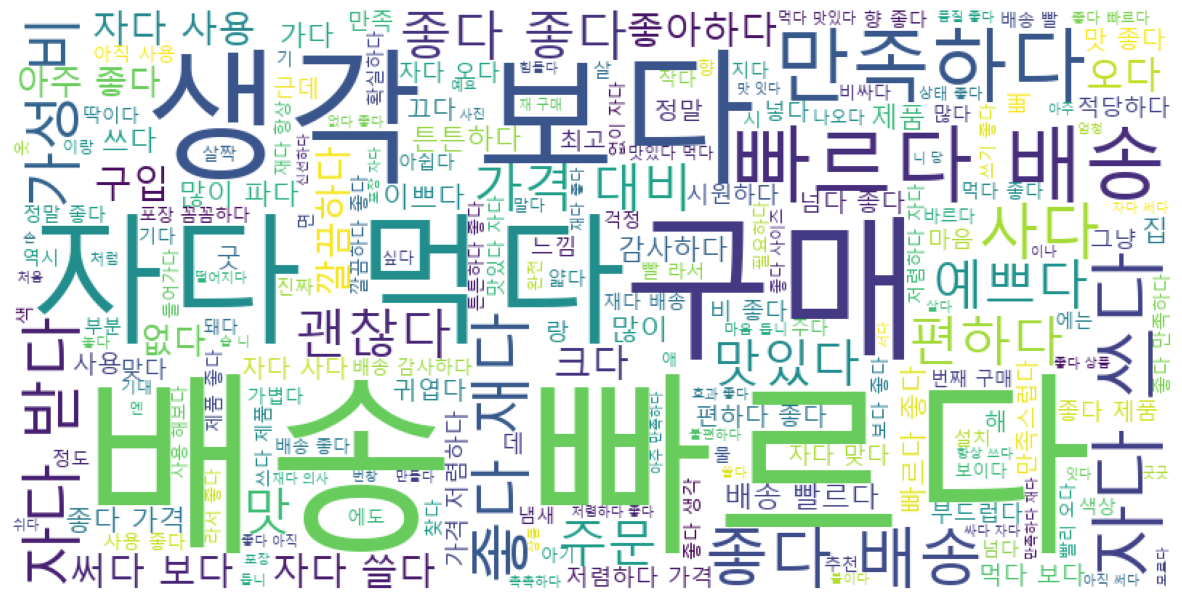

In [35]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
displayWordCloud(positive_text)

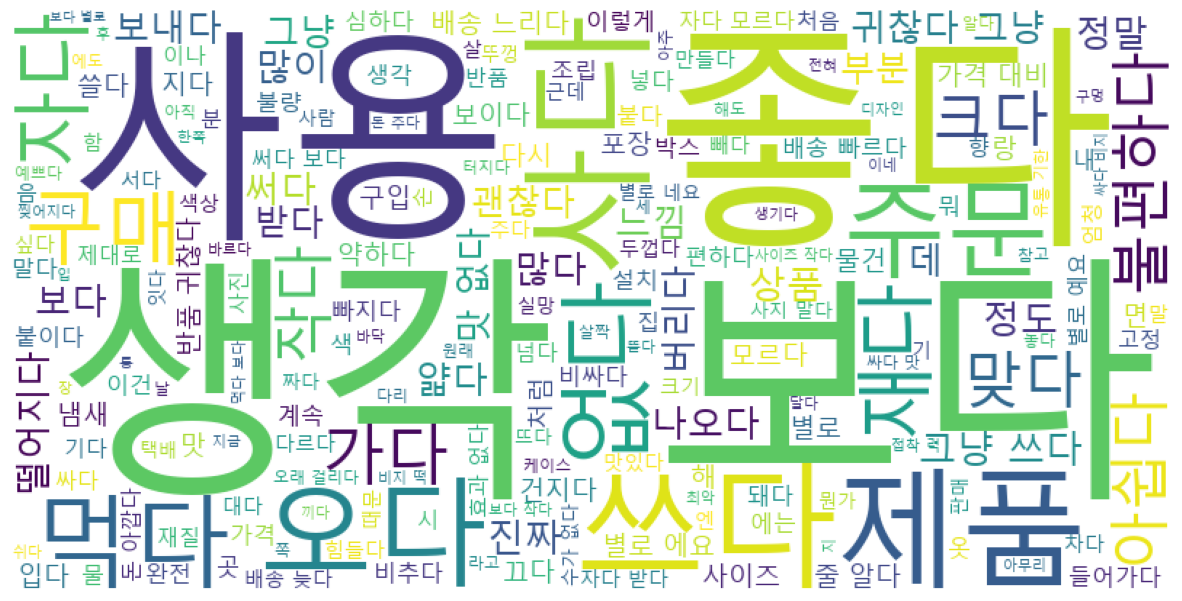

In [36]:
displayWordCloud(negative_text)

## ÏòàÏãú 2. LSTMÏùÑ Ïù¥Ïö©Ìïú ÏáºÌïë Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Ïù¥ÏßÑ Î∂ÑÎ•ò (w. Word2vec)

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_reviews'], data['label'], test_size=0.2, stratify= data['label'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

In [40]:
# Ìå®Îî©
max_len = max(len(seq) for seq in X_train_encoded)
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_len, padding='post')

EMBEDDING MATRIX ÏÉùÏÑ±

In [41]:
# Word2Vec
embedding_dim = cbow.wv.vector_size
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in cbow.wv:
        embedding_matrix[i] = cbow.wv[word]
    else:
        embedding_matrix[i] = np.zeros(embedding_dim)   # ÏóÜÎäî Îã®Ïñ¥Îäî 0ÏúºÎ°ú

MODELING

In [42]:
model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],  # Word2Vec ÏûÑÎ≤†Îî© Îß§Ìä∏Î¶≠Ïä§ ÏÇ¨Ïö©
                    input_length=max_len,
                    trainable=False))

model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 74s 37ms/step - accuracy: 0.8505 - loss: 0.3665 - val_accuracy: 0.8789 - val_loss: 0.3053
Epoch 2/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 70s 35ms/step - accuracy: 0.8800 - loss: 0.3042 - val_accuracy: 0.8823 - val_loss: 0.2958
Epoch 3/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76s 38ms/step - accuracy: 0.8890 - loss: 0.2809 - val_accuracy: 0.8839 - val_loss: 0.2905
Epoch 4/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 90s 45ms/step - accuracy: 0.8943 - loss: 0.2678 - val_accuracy: 0.8888 - val_loss: 0.2873
Epoch 5/5
2000/2000 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 89s 45ms/step - accuracy: 0.8988 - loss: 0.2564 - val_accuracy: 0.8858 - val_loss: 0.2839


In [45]:
print("Ï†ïÌôïÎèÑ %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

1250/1250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 15ms/step - accuracy: 0.8898 - loss: 0.2826
Ï†ïÌôïÎèÑ 0.8865
